In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [2]:
x = np.arange(0,100,0.1)
y = np.sin(x)

In [3]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

Prepare Dataset

In [4]:
def create_dataset(series,time_steps = 20):
    X,y = [],[]
    for i in range(len(series) - time_steps):
        X.append(series[i:i+time_steps])
        y.append(series[i+time_steps])
    return np.array(X),np.array(y)
time_steps = 20
X,y_data = create_dataset(y,time_steps)
X=X.reshape(X.shape[0],X.shape[1],1)

In [5]:
split = int(len(X)*0.8)

In [6]:
split

784

In [7]:
X_train,X_test = X[:split],X[split:]
y_train,y_test = y_data[:split],y_data[split:]

LSTM Model

In [8]:
model = Sequential()
model.add(LSTM(50,activation = 'tanh',input_shape=(time_steps,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss = 'mse')

C:\Users\InterbestPC-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.fit(X_train,y_train,epochs = 10,verbose = 1)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3196   
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0698 
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045 
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5354e-04
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6661e-04 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1605e-04
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4328e-04 
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7713e-04 
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2373e-04 
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0694e-05 


In [10]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [11]:
#y_pred

In [12]:
mse = mean_squared_error(y_test,y_pred)

In [13]:
mse

5.7584635262917604e-05

In [14]:
rmse = np.sqrt(mse)
rmse

np.float64(0.007588454075957606)

In [15]:
r2 = r2_score(y_test,y_pred)

In [16]:
r2

0.9998859491242266

<function matplotlib.pyplot.show(close=None, block=None)>

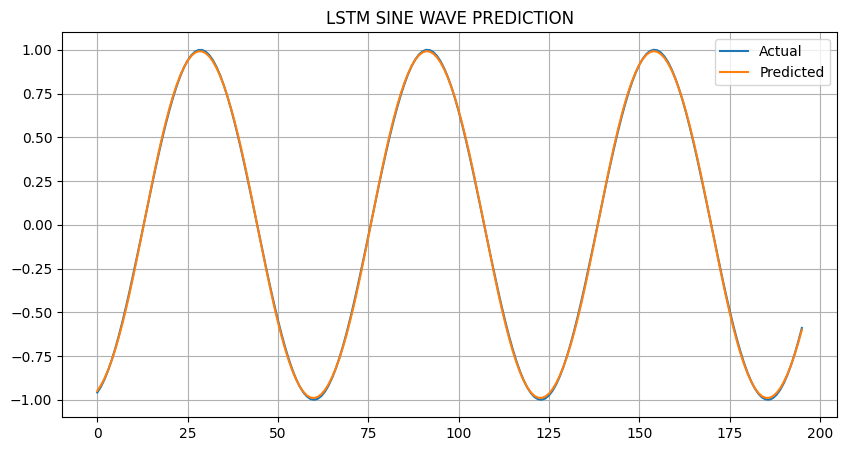

In [17]:
plt.figure(figsize=(10,5))
plt.plot(y_test,label='Actual')
plt.plot(y_pred,label='Predicted')
plt.title("LSTM SINE WAVE PREDICTION")
plt.legend()
plt.grid()
plt.show